In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 24: Hypothesis Testing Errors & Power

Throughout this block, we have been studying hypothesis tests. We have covered the four basic steps of any hypothesis test, and we have practiced various methods for obtaining the distribution of our test statistic under the null hypothesis. 

After we have reached a conclusion (reject or fail to reject), we must consider possible errors. 

### Type I error 

Type I error is the event that we rejected the null hypothesis when the null hypothesis was actually true. Type I error is also known as a false positive. The probability of a Type I error is usually defined by the threshold used for rejection. A common threshold is 0.05. Those of you who have taken statistics before may recognize this value as $\alpha$. 

### Type II error

Type II error is the event that we failed to reject the null hypothesis when the null hypothesis was actually false. This is otherwise known as a false negative. The probability of a Type II error is harder to find and requires a more in-depth analysis of a hypothesis test. The probability of a Type II error is often given as $\beta$, and $1-\beta$ is referred to as **Power**. The power of a test is probability that we will reject the null hypothesis when we are supposed to. 

Which one of these errors is more serious? It depends on the context of the problem. 

### Example: Golf Balls

Joe has a summer job at a golf course and one of his jobs is to fish out golf balls from the water traps. He has a theory that certain types of golf ball are more likely to end up in the water than others. Let's assume there are four brands of golf ball, let's and assume that all four are used equally at this golf course. He fishes out 100 golf balls and counts each brand. He finds 30 of brand A, 30 of brand B, 20 of brand C and 20 of brand D. Conduct a hypothesis test to determine whether certain types of golf ball are more likely than others to end up in the water.

Step 1: Hypotheses

Null Hypothesis - each type of golf ball is equally likely to end up in the water

Alternate Hypothesis - certain types of golf ball are more likely to end up in the water than others

Step 2: Test statistic

There are many correct answers, but let's go with sum of absolute difference between observed and expected counts under $H_0$. To do this, we need to find the expected counts. If each ball was equally likely, how many should we expected to find of each if we select 100 golf balls? 

In [2]:
obs = make_array(30,30,20,20)
exp = make_array(25,25,25,25)
test_stat = sum(abs(obs-exp))
print('test statistic: ' + str(test_stat))

test statistic: 20


Step 3: $p$-value

We need the distribution of the test statistic under $H_0$. 

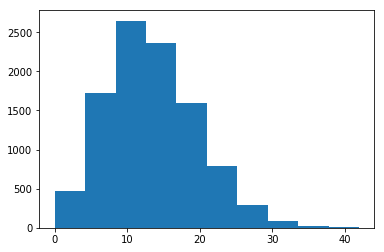

In [3]:
#distribution of test statistic 
ts = []
for i in np.arange(10000): 
    #simulate the scenario
    rs = stats.multinomial.rvs(100,(0.25,0.25,0.25,0.25),size=1)
    #test statistic
    ts = np.append(ts,sum(abs(sum(rs)-25)))
plt.hist(ts)
plt.show()

In [4]:
np.mean(ts>=20)

0.1873

Step 4: Conclude

There is not enough evidence to reject null hypothesis. Assume null hypothesis is true.

What kind of error could we have made in this case? 

We could have made a Type II error: accepting the null hypothesis when it is actually false.

#### Power 
Suppose that, in truth, 30% of the balls found in the water were brand A, 30% were brand B, 20% were brand C and 20% were brand D. In this case, our collected sample reflected this truth perfectly. However, our hypothesis test failed to recognize this deviation from equal proportions. We made a type II error. This is because this test has fairly low power. Use simulation to determine the power of this test. 

I am looking for the probability that I reject the null hypothesis given the true proportions laid out above. Well, first I need to figure out for what values of my test statistic I would reject $H_0$. 

In [5]:
critical_value = percentile(95,ts) + 1 #the value of my test statistic I would reject the null
print(critical_value)

#test the critical value
np.mean(ts>=critical_value)

25.0


0.0406

Next, I need to simulate from the true population and determine how often my test statistic would have met this threshold. 

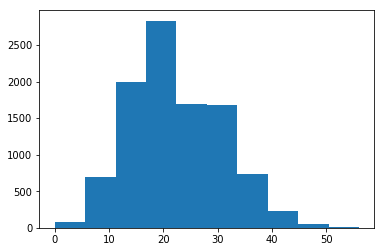

In [6]:
#distribution of test statistic 
ts_power = []
for i in np.arange(10000): 
    #simulate the scenario
    rs = stats.multinomial.rvs(100,(0.3,0.3,0.2,0.2),size=1)
    #test statistic
    ts_power = np.append(ts_power,sum(abs(sum(rs)-25)))
ts_power
plt.hist(ts_power)
plt.show()

In [7]:
#Compute P-Value
np.mean(ts_power>=critical_value)

0.3508

What do you think about this power? 

This is a very low power. Even though the null hypothesis is wrong, this test will detect this test statistic (the change in the truth (30,30,20,20) and the null hypothesis (pi = .25) ) ONLY roughly 34% of the time. We would like a high power. This is a lower power probably because the numbers are relatively close, a small difference to detect. Also, the threshold (95) and the number of golf balls collected (only 100).

Repeat this power calculation, but assume Joe collects 500 balls instead of 100. Note that you will have to obtain a new critical value. What does this tell you about power and sample size?

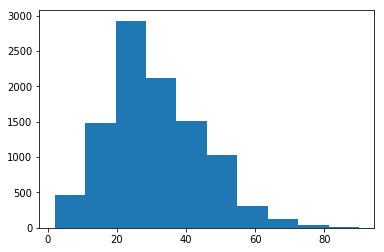

In [8]:
#distribution of test statistic under null hypothesis
ts500 = []
for i in np.arange(10000): 
    #simulate the scenario
    rs = stats.multinomial.rvs(500,(0.25,0.25,0.25,0.25),size=1)
    #test statistic
    ts500 = np.append(ts500,sum(abs(sum(rs)-125)))
plt.hist(ts500)
plt.show()

In [9]:
crit = percentile(95,ts500) + 1
np.mean(ts500>=crit)

0.0474

In [10]:
ts500power = []
for i in np.arange(10000): 
    #simulate the scenario
    rs = stats.multinomial.rvs(500,(0.3,0.3,0.2,0.2),size=1)
    #test statistic
    ts500power = np.append(ts500power,sum(abs(sum(rs)-125)))
ts500power

array([ 86.,  96.,  44., ...,  70., 124.,  98.])

In [11]:
np.mean(ts500power>=crit)

0.9799

It can be seen that power goes up with a higher sample size.